In [1]:
import pandas as pd

import feedparser
import newspaper
# from konlpy.tag import Kkma
from konlpy.tag import Mecab
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [20]:
# 'http://rss.hankyung.com/new/news_main.xml' 
# 'http://file.mk.co.kr/news/rss/rss_50300009.xml'
# 'http://www.khan.co.kr/rss/rssdata/total_news.xml' 
rss_link = 'http://www.khan.co.kr/rss/rssdata/total_news.xml' 

In [21]:
#  feedparser, newspaper: RSS를 통해 뉴스의 본문을 수집
feeds = feedparser.parse(rss_link)
links = [entry['link'] for entry in feeds['entries']]

In [22]:
news_text = ''
for link in links:
    article = newspaper.Article(link, language='ko')
    article.download()
    article.parse()
    news_text += article.text

In [23]:
# konlpy, Mecab: 형태소 분석을 통해 본문에서 명사추출, 1글자는 단어는 삭제;
# Mecab engine으로 바뀜.
engine = Mecab()
nouns = engine.nouns(news_text)
nouns = [n for n in nouns if len(n) > 1]

# Create list of two words
nouns_two = [nouns[x] + nouns[x+1] for x in range(len (nouns)-1)]
count_two = Counter(nouns_two)

# Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 40개
count = Counter(nouns)
tags = count.most_common(40)

tags_dict = dict(tags)
tags_dict1 = dict(count_two)
tags_dict1 = { k:v for k,v in tags_dict1.items() if v >= 4 }

temp_list = [(engine.nouns(k),v) for k,v in tags_dict1.items()]

for x in temp_list:
    for y in x[0]:
        if (y in tags_dict.keys()):
            tags_dict[y] -= x[1]

tags_dict.update(tags_dict1)

In [24]:
tags_count = Counter(tags_dict)
tags_temp = tags_count.most_common(40)

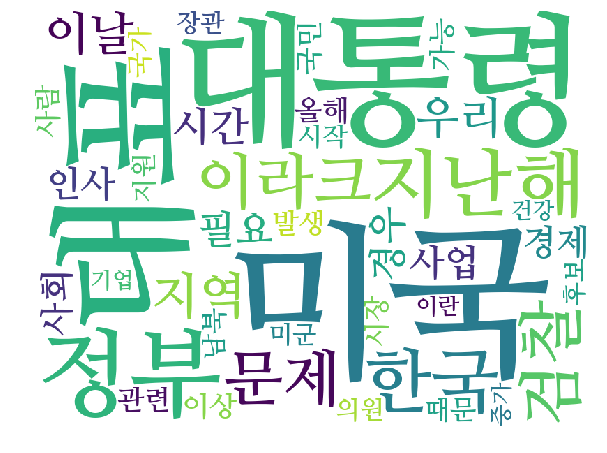

In [30]:
# WordCloud, matplotlib: 단어 구름 그리기
font_path = '/Users/minseok/Downloads/Nanum_Myeongjo/NanumMyeongjo-Bold.ttf'
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)

In [26]:
tags_dict

{'대비필요': 4,
 '이라크': 48,
 '복직예정자': 4,
 '공급중단': 4,
 '단일팀구성': 5,
 '하청업체': 7,
 '국가': 56,
 '항암제내성': 6,
 '체중출산': 4,
 '신체활동': 5,
 '인사갈등': 4,
 '항만공사': 8,
 '괄약근신경': 4,
 '병원국민': 6,
 '철도도로': 9,
 '판매잔액': 10,
 '대법원판결': 4,
 '노인일자리': 4,
 '보석피고': 5,
 '베버민주주의': 4,
 '폐질환천식': 4,
 '후보이날': 5,
 '가지이상': 5,
 '한국정치': 4,
 '사립대학': 4,
 '치료효과': 8,
 '대학재정': 6,
 '조국법무부': 4,
 '의원이날': 4,
 '일상생활': 4,
 '지급계획': 5,
 '설립회사': 4,
 '중처법상': 4,
 '쌍용차지': 4,
 '원칙수용': 4,
 '야구선수': 6,
 '국제법위반': 4,
 '피해자피해자': 4,
 '공간조성': 4,
 '대통령남북': 13,
 '보복공격': 6,
 '집필알레르기': 4,
 '퇴직관료': 4,
 '예방접종': 10,
 '관광재개': 9,
 '광주지검': 4,
 '질환원인': 4,
 '이번사건': 8,
 '자살위험': 4,
 '전자협동': 4,
 '업무수행': 4,
 '사우디이란': 4,
 '마스크착용': 8,
 '학교공간': 4,
 '초미세먼지': 14,
 '노조사건': 4,
 '식도사이': 4,
 '주둔이라크': 6,
 '보장사회': 5,
 '세계최대': 6,
 '등록신청': 4,
 '연구개발': 5,
 '경제도약': 4,
 '남북관계': 22,
 '폐렴독감': 4,
 '특정범죄': 6,
 '기관채용': 5,
 '이날국회': 6,
 '근대골목': 5,
 '효과기대': 4,
 '비핵화협상': 4,
 '올해': 97,
 '질환악화': 4,
 '성심질환': 6,
 '이라크미군': 21,
 '노랑깃발': 4,
 '남북협력': 24,
 '취약계층': 4,
 '중동미국': 4,
 '국민': 72,
 '실태조사': 4,
 '